<a href="https://colab.research.google.com/github/JackMAlucard/Data-Scientist-Technical-Assessment/blob/main/ta_fake_real_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1️⃣ Data Cleaning and Preprocessing

##💾 Loading the text dataset and inspecting its structure

###Setting up the Kaggle API to import the datasets directly from Kaggle
**Setting up the Kaggle API to import the datasets directly from Kaggle**

In [1]:
# Upload Kaggle API Credentials, downloaded from https://www.kaggle.com/settings
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jackmalucard","key":"2aa4618ce05c77e80b6f52fc895aa216"}'}

In [2]:
# Move Kaggle API Credentials
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
# Set Permissions
!chmod 600 ~/.kaggle/kaggle.json

###Downloading dataset from Kaggle

In [3]:
# Download dataset directly using the Kaggle API
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset/
!ls

 98% 40.0M/41.0M [00:03<00:00, 19.8MB/s]
100% 41.0M/41.0M [00:03<00:00, 13.1MB/s]
fake-and-real-news-dataset.zip	sample_data


###Extracting dataset from zip file into the ```/content``` directory.

In [4]:
# Import 'zipfile' module
import zipfile

# Specify the path to the zip file with the dataset
zip_file_path = 'fake-and-real-news-dataset.zip'

# Specify the directory where the files are to be extracted
extract_dir = '/content'

# Extract the files
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

!ls

fake-and-real-news-dataset.zip	Fake.csv  sample_data  True.csv


Getting the names of the files inside the dataset to be used later

In [5]:
import os

# Specify the directory path
directory_path = '/content'

# Specify the desired file extension
extension = '.csv'

# Get a list of file names in the directory
file_names = os.listdir(directory_path)

# Filter and save filenames with the desired extension
filtered_files = [file_name for file_name in file_names if file_name.endswith(extension)]

# Print the list of file names
print("List of file names in the directory:")
for file_name in filtered_files:
    print(file_name)

List of file names in the directory:
Fake.csv
True.csv


###Loading and inspecting data

In [6]:
# Import pandas library
import pandas as pd

In [7]:
# Load the dataset files into Pandas DataFrames
df1 = pd.read_csv(filtered_files[0])
df2 = pd.read_csv(filtered_files[1])

In [8]:
# Fake News Dataset (df1)
# Get basic information about df1
print("Fake News dataframe info:")
print(df1.info())
print("\n")

# Display the first few rows of df1
print("First few rows of Fake News DataFrame:")
print(df1.head())

Fake News dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


First few rows of Fake News DataFrame:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was reveal

In [9]:
# Real News Dataset (df2)
# Get basic information about df2
print("Real News dataframe info:")
print(df2.info())
print("\n")

# Display the first few rows of df2
print("First few rows of Real News DataFrame:")
print(df2.head())

Real News dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


First few rows of Real News DataFrame:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHIN

**Observations on the datasets based on their structure**

After loading the two datasets into dataframes, and inspecting them by printing its basic properties and its first few rows, it can be determined that the datasets consist of:
- 4 data columns
- The rows of each column contain text
- The columns contain the following information for each news article:
  1. title
  2. text
  3. subject
  4. date

Thus far, it could be said that the most relevant text information that can be used to classify each news article would be contained in the *title* and *text* columns.

The specific *date* information *may* be irrelevant for the classification if the articles are all pulled from the same relatively short time frame.

The *subject* column may contain similar or repeated subjects.

The Kaggle page for this dataset somewhat confirms the last two paragraphs. The time frame for the Fake News set is 30-Mar-15 to 18-Feb-18, while for the Real News set it is 12-Jan-16 to 30-Dec-17. 68% of the subjects for the Fake News set is made up of the generic 'News' and 'Politics' subjects, while the Real News set is entirely made up of the subjects 'politicsNews' and 'worldNews'.

The ```info``` method of the pandas library indicates that there are no missing values on either set. The Kaggle page however indicates that 3% of the data from the Fake News set is empty.

##🚫 Handle missing values in text data if *present*

Considering the information from the Kaggle page, that there are certain *empty* text rows on the datasets, we check this fact in order to later drop the necessary empty rows from the dataframes.

In [10]:
# Iterate through the column dataframes, and then through the title and text
# columns to count how many have empty space values
for dataframe in (df1, df2):
  for column in ('title', 'text'):
    empty_space_count = 0
    for value in dataframe[column]:
      if value.isspace(): empty_space_count += 1
    print(f"Number of values filled with empty spaces in: {empty_space_count}")

Number of values filled with empty spaces in: 0
Number of values filled with empty spaces in: 630
Number of values filled with empty spaces in: 0
Number of values filled with empty spaces in: 1


The previous code block indicates that, as a whole, there are several text rows in the *text* columns. We will drop these rows before we continue with text preprocessing

In [11]:
# Drop rows with strings filled with empty spaces (whitespace)
df1 = df1[df1.applymap(lambda x: not isinstance(x, str) or x.strip() != '').all(axis=1)]
df2 = df2[df2.applymap(lambda x: not isinstance(x, str) or x.strip() != '').all(axis=1)]

# Print new dataframes info and check for empty spaces again
for dataframe in (df1, df2):
  print(dataframe.info())
  for column in ('title', 'text'):
    empty_space_count = 0
    for value in dataframe[column]:
      if value.isspace(): empty_space_count += 1
    print(f"Number of values filled with empty spaces in: {empty_space_count}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22851 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    22851 non-null  object
 1   text     22851 non-null  object
 2   subject  22851 non-null  object
 3   date     22851 non-null  object
dtypes: object(4)
memory usage: 892.6+ KB
None
Number of values filled with empty spaces in: 0
Number of values filled with empty spaces in: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21416 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
dtypes: object(4)
memory usage: 836.6+ KB
None
Number of values filled with empty spaces in: 0
Number of values filled with empty spaces in: 0


##🔄 Perform text preprocessing steps

**Considerations before preprocessing**

Before performing text preprocessing, the two sets will be unified into a single dataset with the following columns: title, text, label (0 fake, 1 real). With the added label column, a first step in the preprocessing task, Encoding Categorical Labels, is already achieved.

The subject column has been dropped with the working assumption that due to the apparent uniformity in the subjects, these categorization of the news will not be significantly relevant to the classification task.

The date column has been dropped since, even though it could also be used to classify these kind of news by pattern seeking in the distribution of the dates, it is not relevant for classification at an NLP level.

###Merging datasets, dropping subject and date columns, adding label and category column

In [12]:
# Merge the DataFrames, selecting specific columns
df = pd.concat([df1[['title', 'text']], df2[['title', 'text']]])

# Add a new column to indicate the source (0 for Fake News df1, 1 for Real News df2)
df['category'] = ['Fake'] * len(df1) + ['Real'] * len(df2)
df['label'] = [0] * len(df1) + [1] * len(df2)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Printing new merged dataframe info
print(df.info())
#print(df.head())
#print(df.tail())
print('\n')

# Change data type of 'label' column from int64 to int32
df['label'] = df['label'].astype('int32')

# Randomly reorder the rows
df = df.sample(frac=1).reset_index(drop=True)
# Printing new merged dataframe info
print(df.info())
#print(df.head())
#print(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44267 entries, 0 to 44266
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44267 non-null  object
 1   text      44267 non-null  object
 2   category  44267 non-null  object
 3   label     44267 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44267 entries, 0 to 44266
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44267 non-null  object
 1   text      44267 non-null  object
 2   category  44267 non-null  object
 3   label     44267 non-null  int32 
dtypes: int32(1), object(3)
memory usage: 1.2+ MB
None


###Applying basic preprocessing techniques

Importing libaries to be used and define basic preprocessing techniques functions

In [7]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Not used yet, for visualization techniques
from wordcloud import WordCloud
from nltk import FreqDist
import matplotlib.pyplot as plt

# Initialize NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Defining preprocessing techniques

In [14]:
# Basic preprocessing techniques
def text_preprocessing(text):
    # Lowercase the text
    text = text.lower()

    # Remove leading/trailing whitespaces
    text = text.strip()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove punctuation and stop words
    tokens = [word for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Rejoin the tokens into a cleaned text
    cleaned_text = ' '.join(tokens)

    return cleaned_text

Applying basic preprocessing to datasets

In [15]:
# Apply text preprocessing to dataset
df['clean_text'] = df['text'].apply(text_preprocessing)

##✨ Provide a clean, preprocessed text dataset with extensive documentation

The clean processed dataset consists of the following 5 columns of data:
- *title*: News article title (string object)
- *text*: News article text (string object)
- *category*: A string indicating whether the article is 'Real' or 'Fake' (string object)
- *label*: A numeric label indicating whether the article is Real (1) or Fake (0) (integer)
- *clean_text*: Preprocessed text tokens joined in a single string with spaces ' '. The preprocessing steps included lowercasing, removing leading/trailing whitespaces, removing punctuation and stop words.

There are no rows of data which contain empty data.

The rows of data have been randomly reordered from the original dataset so that fake and real news are not grouped in the final dataset.

In [8]:
print(df.info())
print(df.head())
#print(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44267 entries, 0 to 44266
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44267 non-null  object
 1   text        44267 non-null  object
 2   category    44267 non-null  object
 3   label       44267 non-null  int64 
 4   clean_text  44266 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None
                                               title  \
0  FULL SPEECH: Donald Trump Speaks to 20,000 PLU...   
1  HILLARY’S ANTI-TRUMP MUSLIM DAD Claims Terror ...   
2  OAS says Honduran presidential election should...   
3  Exclusive: Displaced Rohingya in camps face ai...   
4  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   

                                                text category  label  \
0  Donald Trump is doing exactly the opposite of ...     Fake      0   
1  We ve inserted our thoughts and a few tweets t...     Fake      0   
2  T

Saving the resulting clean dataset:

In [21]:
# Save the DataFrame to a CSV file
# Exclude the DataFrame index from the CSV (index=False)
df.to_csv('clean_dataset.csv', index=False)

#2️⃣ Text Analysis and Feature Extraction

###Upload clean_dataset.csv (only if needed due to discconnection from runtime)

Load clean_dataset.zip from Google Drive

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the file in your Google Drive
# Replace 'folder' with the corresponding Google Drive Folder
# where the file is located
folder = 'Technical Assessment - DS'
file_path = '/content/drive/My Drive/' + folder + '/clean_dataset.zip'

# Copy the file to Colab's local directory
import shutil
shutil.copy(file_path, '/content')

# Verify that the file has been copied
import os
os.listdir('/content')

Mounted at /content/drive


['.config', 'clean_dataset.zip', 'drive', 'sample_data']

Extract clean_dataset.csv from zip file

In [2]:
# Import 'zipfile' module
import zipfile

# Specify the path to the zip file with the dataset
zip_file_path = 'clean_dataset.zip'

# Specify the directory where the files are to be extracted
extract_dir = '/content'

# Extract the files
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

!ls

clean_dataset.csv  clean_dataset.zip  drive  sample_data


Sabe clean_dataset.csv into a dataframe object

In [28]:
# Import pandas library
import pandas as pd

# Load the dataset files into Pandas DataFrames
df = pd.read_csv('clean_dataset.csv')

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44267 entries, 0 to 44266
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44267 non-null  object
 1   text        44267 non-null  object
 2   category    44267 non-null  object
 3   label       44267 non-null  int64 
 4   clean_text  44266 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None
                                               title  \
0  FULL SPEECH: Donald Trump Speaks to 20,000 PLU...   
1  HILLARY’S ANTI-TRUMP MUSLIM DAD Claims Terror ...   
2  OAS says Honduran presidential election should...   
3  Exclusive: Displaced Rohingya in camps face ai...   
4  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   

                                                text category  label  \
0  Donald Trump is doing exactly the opposite of ...     Fake      0   
1  We ve inserted our thoughts and a few tweets t...     Fake      0   
2  T

##📝 Conduct text analysis to gain insights from the text data

###Basic statistics and keyword analysis

###Histogram with the number of tokens for 'Real' and 'Fake' news

Importing required libraries and creating column with number of tokens

The following code cell was written because the dataframe presented an error when calling the ```word_tokenize````method after the data loaded in df came from a downloaded source. The error did not appear before, so the code here is presented just in case.

In [32]:
# Count the number of 'None' values in the 'clean_text' column
num_none_values = df['clean_text'].isna().sum()

# Print the count
print(f'Number of "None" values in the clean_text column: {num_none_values}')

# Drop rows with 'None' values in the 'clean_text' column
df.dropna(subset=['clean_text'], inplace=True)
df.reset_index(drop=True, inplace=True)

print(df.info())

Number of "None" values in the clean_text column: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44266 entries, 0 to 44265
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44266 non-null  object
 1   text        44266 non-null  object
 2   category    44266 non-null  object
 3   label       44266 non-null  int64 
 4   clean_text  44266 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')

# Tokenize the 'clean_text' column and count the number of tokens
df['num_tokens'] = df['clean_text'].apply(lambda x: len(word_tokenize(x)))

# Separate data for 'Real' and 'Fake' categories
real_tokens = df[df['category'] == 'Real']['num_tokens']
fake_tokens = df[df['category'] == 'Fake']['num_tokens']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Plotting histogram

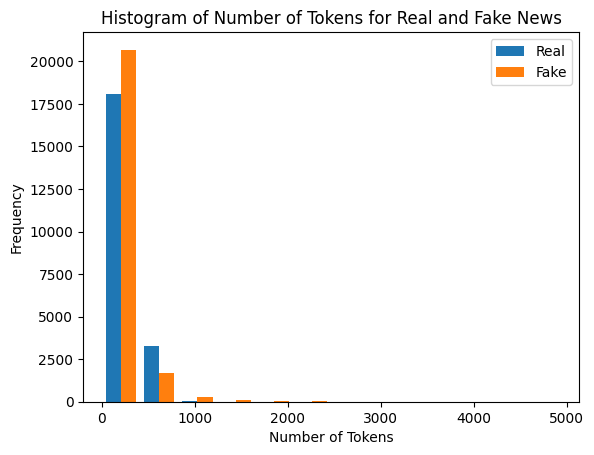

In [35]:
# Create a histogram for 'Real' and 'Fake' tokens
plt.hist([real_tokens, fake_tokens], bins=12, alpha=1, label=['Real', 'Fake'])
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Tokens for Real and Fake News')
plt.legend()
plt.show()

Seeing as how the data is more dense on the lower values for the number of tokens, the histogram is redrawn reducing the range for this value

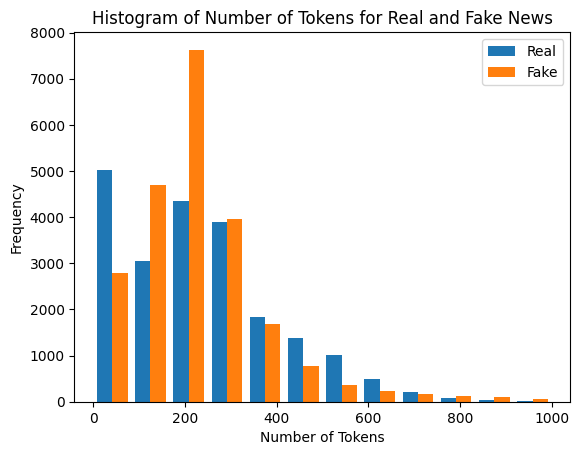

In [36]:
# Set a specific range for the x-axis to focus on lower, more significant values
x_range = (0, 1000)

# Create a histogram for 'Real' and 'Fake' tokens
plt.hist([real_tokens, fake_tokens], bins=12, range=x_range, alpha=1, label=['Real', 'Fake'])
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Tokens for Real and Fake News')
plt.legend()
plt.show()

There is a noticeable difference in the distribution of the number of tokens between Fake and Real news for the lower values of this number.

###Frequency distribution plots

In [37]:
import pandas as pd
import nltk
from nltk import FreqDist
import matplotlib.pyplot as plt

In [38]:
# Tokenize and flatten the 'clean_text' column to create a list of all tokens
all_tokens = [token for text in df['clean_text'] for token in nltk.word_tokenize(text)]

# Create frequency distributions for 'Real' and 'Fake' news
real_tokens = [token for text in df[df['category'] == 'Real']['clean_text'] for token in nltk.word_tokenize(text)]
fake_tokens = [token for text in df[df['category'] == 'Fake']['clean_text'] for token in nltk.word_tokenize(text)]

real_freq_dist = FreqDist(real_tokens)
fake_freq_dist = FreqDist(fake_tokens)

Top words frequencies for Real News

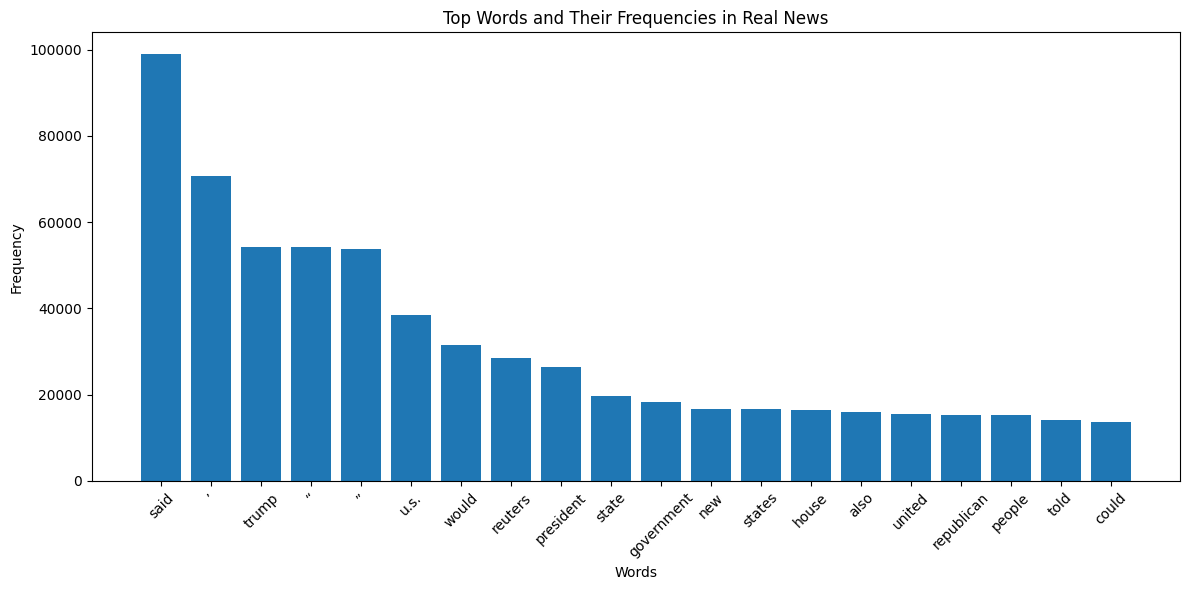

In [39]:
# Set the number of top words to display in the plot
num_top_words = 20

# Get the top words and their frequencies from 'real_freq_dist'
top_words_real = real_freq_dist.most_common(num_top_words)

# Extract the top words and frequencies into separate lists
top_words_real, top_word_frequencies_real = zip(*top_words_real)

# Generate a bar plot for the top words and their frequencies
plt.figure(figsize=(12, 6))
plt.bar(top_words_real, top_word_frequencies_real)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words and Their Frequencies in Real News')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

From this plot, I can see that some of the 'top' words here are just special characters, as well as the word 'reuters' which is just the a name of a news agency, most likely from where the real news were obtained.

These words will be dropped from the tokens in the column 'clean_text'

In [46]:
# Save words to be removed to a list
words_to_remove = [top_words_real[1], top_words_real[3], top_words_real[4], top_words_real[7]]
print('Words to be removed:', words_to_remove)

# Function to remove specific words
def remove_words(text, words_to_remove):
    tokens = text.split()  # Split the text into tokens
    cleaned_tokens = [word for word in tokens if word not in words_to_remove]
    return ' '.join(cleaned_tokens)  # Join the cleaned tokens back into text

# Apply the remove_words function to the 'clean_text' column
df['clean_text'] = df['clean_text'].apply(lambda text: remove_words(text, words_to_remove))

Words to be removed: ['’', '“', '”', 'reuters']


The code blocks preceeding the Real News frequency histogram are repeated

In [47]:
# Tokenize and flatten the 'clean_text' column to create a list of all tokens
all_tokens = [token for text in df['clean_text'] for token in nltk.word_tokenize(text)]

# Create frequency distributions for 'Real' and 'Fake' news
real_tokens = [token for text in df[df['category'] == 'Real']['clean_text'] for token in nltk.word_tokenize(text)]
fake_tokens = [token for text in df[df['category'] == 'Fake']['clean_text'] for token in nltk.word_tokenize(text)]

real_freq_dist = FreqDist(real_tokens)
fake_freq_dist = FreqDist(fake_tokens)

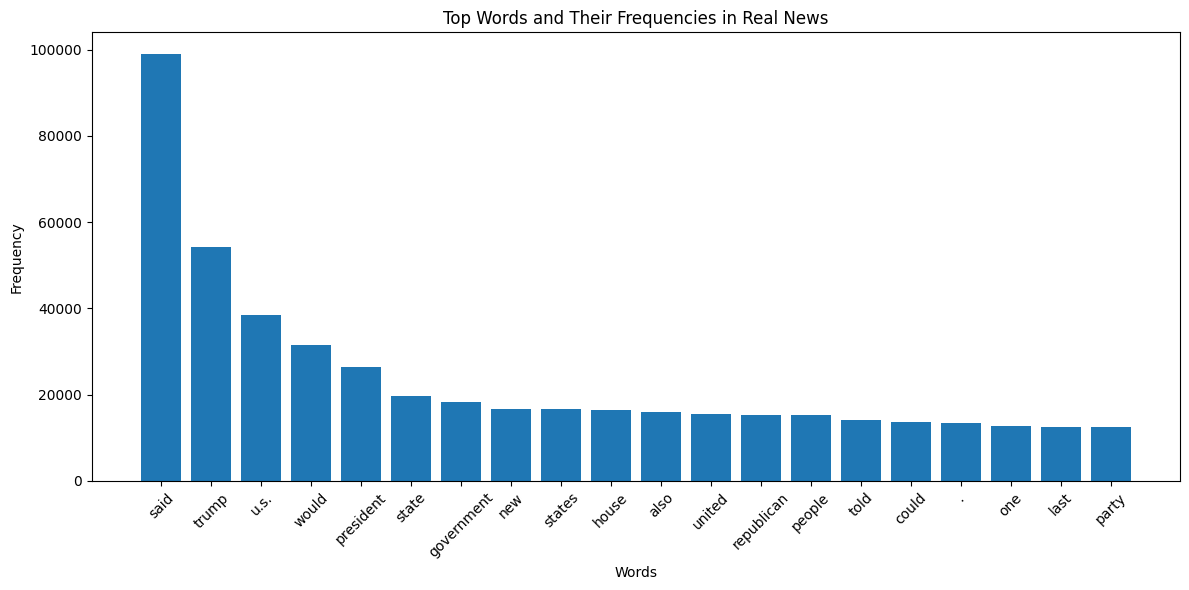

In [48]:
# Set the number of top words to display in the plot
num_top_words = 20

# Get the top words and their frequencies from 'real_freq_dist'
top_words_real = real_freq_dist.most_common(num_top_words)

# Extract the top words and frequencies into separate lists
top_words_real, top_word_frequencies_real = zip(*top_words_real)

# Generate a bar plot for the top words and their frequencies
plt.figure(figsize=(12, 6))
plt.bar(top_words_real, top_word_frequencies_real)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words and Their Frequencies in Real News')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Top words frequencies for Fake News

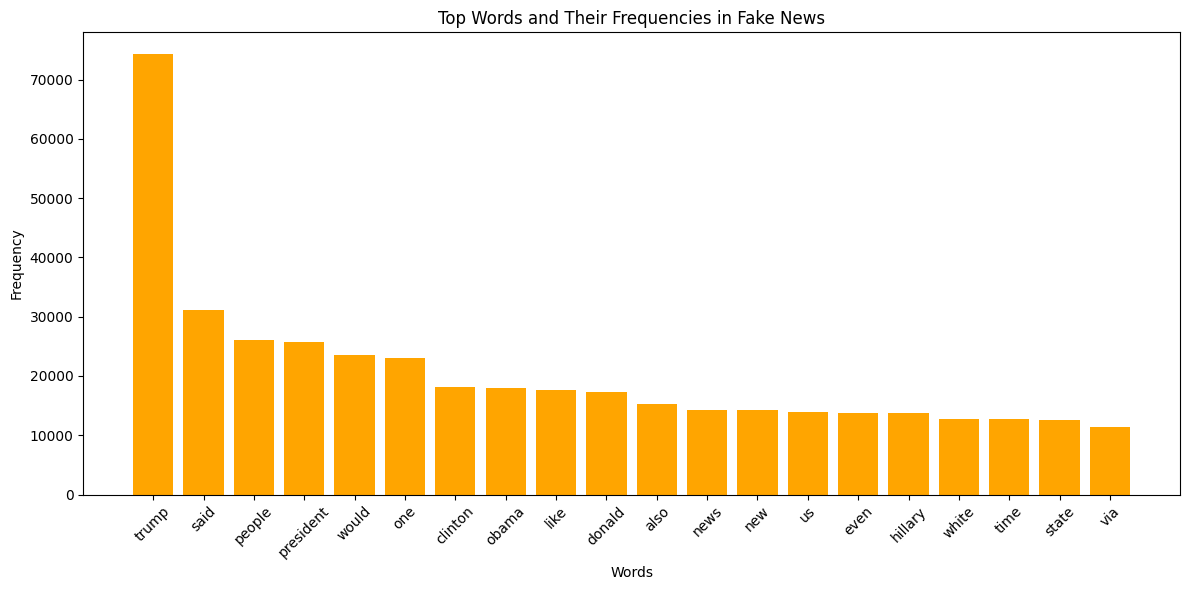

In [49]:
# Set the number of top words to display in the plot
num_top_words = 20

# Get the top words and their frequencies from 'real_freq_dist'
top_words_fake = fake_freq_dist.most_common(num_top_words)

# Extract the top words and frequencies into separate lists
top_words_fake, top_word_frequencies_fake = zip(*top_words_fake)

# Generate a bar plot for the top words and their frequencies
plt.figure(figsize=(12, 6))
plt.bar(top_words_fake, top_word_frequencies_fake, color='orange')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words and Their Frequencies in Fake News')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

A stark difference can also be seen in the top words frequencies for both datasets.

The Fake news data set features the word 'trump' prominently in such a manner that the frequency for the next top word, 'said' drops considerably and then it only drops gradually for the next top words.

The Real news dataset share the same two top words, but in inverse places. The drop in frequency for the top words is also smoother than in the case for the Fake news dataset, as previously exemplified.

###Number of unique terms

The number of unique terms is of interest in the case of limiting the number of features to be considered for feature extraction next.

In [50]:
# Initialize the set to store unique terms
unique_terms = set()

# Tokenize and find unique terms
for text in df['clean_text']:
    words = nltk.word_tokenize(text)
    unique_terms.update(words)

# Get the number of unique terms
num_unique_terms = len(unique_terms)

print(f'Number of unique terms in the dataset: {num_unique_terms}')

Number of unique terms in the dataset: 221656


##🛰️ Extract advanced features from text data

###TF-IDF Vectorization

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the DataFrame into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df['clean_text'], df['category'], test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Using a limited maximum of unique terms

# Fit and transform the vectorizer on the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

###Word Embeddings

Using the pre-trained "word2vec-news-300d-1M" FastText model to convert text into embeddings

In [45]:
import pandas as pd
import nltk
import numpy as np
from gensim.models import KeyedVectors

# Downloading fasttext word vectors
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip wiki-news-300d-1M.vec.zip
!ls

--2023-10-10 02:45:32--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.224.250.75, 13.224.250.44, 13.224.250.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.224.250.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  91.4MB/s    in 5.4s    

2023-10-10 02:45:38 (121 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   
clean_dataset.csv		True.csv
fake-and-real-news-dataset.zip	wiki-news-300d-1M.vec
Fake.csv			wiki-news-300d-1M.vec.zip
sample_data


In [47]:
# Load the pre-trained FastText model
# Replace 'path/to/word2vec-news-300d-1M.vec' with the actual path to the downloaded model file
word2vec_model = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec', binary=False)

# Function to convert text into embeddings (averaging word vectors)
def text_to_embeddings(text, model):
    words = nltk.word_tokenize(text)
    embeddings = [model[word] for word in words if word in model.vocab]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return zeros for empty text

# Convert text data to word embeddings using the loaded model
df['word_embeddings'] = df['clean_text'].apply(lambda text: text_to_embeddings(text, word2vec_model))

AttributeError: ignored

##📊 Visualize and explore text data patterns using advanced NLP visualization

Text

In [ ]:
#Code

#3️⃣ Predictive Modeling with NLP

Text

##✂️ Split the text dataset into training, validation, and testing sets

Text

In [ ]:
#Code

##📈 Choose and implement an NLP model to handle the text data

Text

##🤖 Select an algorithm that best suits the needs of this assessment

Text

In [ ]:
#Code

##🏃‍♂️ Train the model on the training set

Text

In [ ]:
#Code

##📝 Evaluate the model on the validation set

Text

#4️⃣ Model Interpretation

Text

##👨‍💻 Interpret complex text model predictions

Text

In [ ]:
#Code

##🧑‍🚀 Explore the model's sensitivity

Text

In [ ]:
#Code

##🧑‍🏫 Discuss the model's robustness

Text

In [ ]:
#Code